In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!pip install idx2numpy

import tensorflow as tf
import tensorflow.keras as keras
import idx2numpy
import cv2 as cv
import numpy as np
import gzip
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Input,GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, AveragePooling2D

train_data_path = '/content/gdrive/My Drive/data11/train-images-idx3-ubyte.gz'
test_data_path = '/content/gdrive/My Drive/data11/t10k-images-idx3-ubyte.gz'
train_label_path = '/content/gdrive/My Drive/data11/train-labels-idx1-ubyte.gz'
test_label_path = '/content/gdrive/My Drive/data11/t10k-labels-idx1-ubyte.gz'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
  Created wheel for idx2numpy: filename=idx2numpy-1.2.2-cp36-none-any.whl size=8032 sha256=09419caf9a41eb8e459cadc13b39422ab0b2a6c516aa152b0b5c4c33939d7e45
  Stored in directory: /root/.cache/pip/wheels/7a/b5/69/3e0757b3086607e95db70661798fdf98a77a0bb79c54e1f320
Successfully built idx2numpy


In [0]:

class inception():

	def __init__(self):
		input_img = Input(shape = (28, 28, 1))
		l_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
		l_1 = Conv2D(64, (3,3), padding='same', activation='relu')(l_1)
		l_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
		l_2 = Conv2D(64, (5,5), padding='same', activation='relu')(l_2)
		l_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
		l_3 = Conv2D(64, (1,1), padding='same', activation='relu')(l_3)
		output = keras.layers.concatenate([l_1, l_2, l_3], axis = 3)
		self.output = Flatten()(output)
		self.out    = Dense(10, activation='softmax')(output)
		self.model = keras.models.Model(inputs = input_img, outputs = self.out)


	def extract_data(self, filepath, num_img):
		with gzip.open(filepath) as f:
			f.read(16)
			buf = f.read(28 * 28 * num_img)
			train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
			train_data = train_data.reshape(num_img, 28, 28, 1)
			return train_data

	def extract_labels(self, filepath, num_img):
		with gzip.open(filepath) as f:
			f.read(8)
			buf = f.read(num_img)
			labels= np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
			# labels = labels.reshape(num_img, 28, 28, 1)
			return labels


In [0]:
incept = inception()
x = keras.layers.GlobalAveragePooling2D()(incept.model.output)
output = keras.layers.Dense(10, activation='softmax')(x)
inception.network = keras.models.Model(inputs=[incept.model.input], outputs=[output])

train_data = incept.extract_data(train_data_path, 60000)
train_labels = incept.extract_labels(train_label_path, 60000)
test_data = incept.extract_data(test_data_path, 10000)
test_labels = incept.extract_labels(test_label_path, 10000)



Fd =open('/content/gdrive/My Drive/data11/Network_Best_one.h5', 'w+') 
Fd.close()


In [8]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3 )
cs= ModelCheckpoint(filepath='/content/gdrive/My Drive/data11/Network_Best_one.h5', monitor='val_loss', save_best_only=True)
inception.network.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist = inception.network.fit(train_data, train_labels, batch_size = 170, validation_data=(test_data, test_labels), epochs=300,callbacks = [es,cs])
inception.network.save('/content/gdrive/My Drive/data11/Network_config_undec.h5')
with open('/content/gdrive/My Drive/data11/History_config_undec', 'wb') as file:
  pickle.dump(hist.history, file)


Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 12s 208us/sample - loss: 2.1969 - acc: 0.2961 - val_loss: 2.1180 - val_acc: 0.3837
Epoch 2/300
60000/60000 [==============================] - 12s 205us/sample - loss: 2.0572 - acc: 0.4259 - val_loss: 1.9897 - val_acc: 0.4707
Epoch 3/300
60000/60000 [==============================] - 12s 206us/sample - loss: 1.9384 - acc: 0.4659 - val_loss: 1.8785 - val_acc: 0.4982
Epoch 4/300
60000/60000 [==============================] - 12s 203us/sample - loss: 1.8295 - acc: 0.5082 - val_loss: 1.7843 - val_acc: 0.5198
Epoch 5/300
60000/60000 [==============================] - 12s 203us/sample - loss: 1.7422 - acc: 0.5343 - val_loss: 1.6950 - val_acc: 0.5796
Epoch 6/300
60000/60000 [==============================] - 12s 207us/sample - loss: 1.6596 - acc: 0.5677 - val_loss: 1.6237 - val_acc: 0.5775
Epoch 7/300
60000/60000 [==============================] - 12s 203us/sample - loss: 1.5793 - acc: 

OUTPUT FROM BEST MODEL
10000/10000 - 1s - loss: 0.6029 - acc: 0.8013


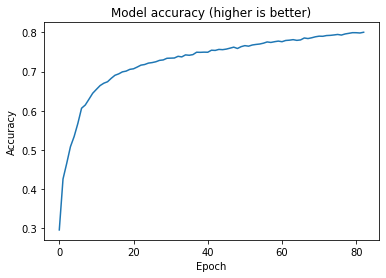

In [9]:

print("OUTPUT FROM BEST MODEL")
#Bestmodel = MiniBatch_GD()
inception.network.load_weights('/content/gdrive/My Drive/data11/Network_Best_one.h5')
oss, acc = inception.network.evaluate(test_data,  test_labels, verbose=2)




import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()